In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

In [3]:
df.shape

(5572, 5)

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2313,ham,So what do you guys do.,NaN,NaN,NaN
2476,ham,i dnt wnt to tlk wid u,NaN,NaN,NaN
4426,ham,So what did the bank say about the money?,NaN,NaN,NaN
1787,ham,Yes:)sura in sun tv.:)lol.,NaN,NaN,NaN
4305,ham,Awww dat is sweet! We can think of something t...,NaN,NaN,NaN


In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvements depending on evluation
7. Converitng to a website

### 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns

In [8]:
df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [9]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)

In [11]:
df.sample(5)

,target,text
1836,ham,Are you wet right now?
4965,spam,URGENT! We are trying to contact U. Todays dra...
695,ham,Good. Good job. I like entrepreneurs
5196,spam,Spook up your mob with a Halloween collection ...
1801,ham,I wanna watch that movie


### We want numeric values in target column in place of 'ham' and 'spam'

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep = 'first')

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

#### We want to see the distribution of ham and spam values

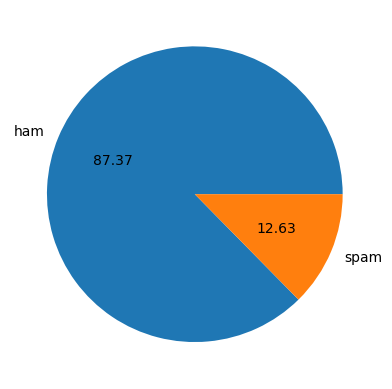

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jmd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [25]:
df['num_characters'] = df['text'].apply(len)

C:\Users\jmd\AppData\Local\Temp\ipykernel_7148\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['text'].apply(lambda x: nltk.word_tokenize(x)) # using word_tokenize to break the message into different words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [28]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # using word_tokenize to break the message into different words

C:\Users\jmd\AppData\Local\Temp\ipykernel_7148\2225745215.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # using word_tokenize to break the message into different words


In [29]:
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [30]:
df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # using sent_tokenize to break the message into different sentecnes

C:\Users\jmd\AppData\Local\Temp\ipykernel_7148\941227403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # using sent_tokenize to break the message into different sentecnes


In [31]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

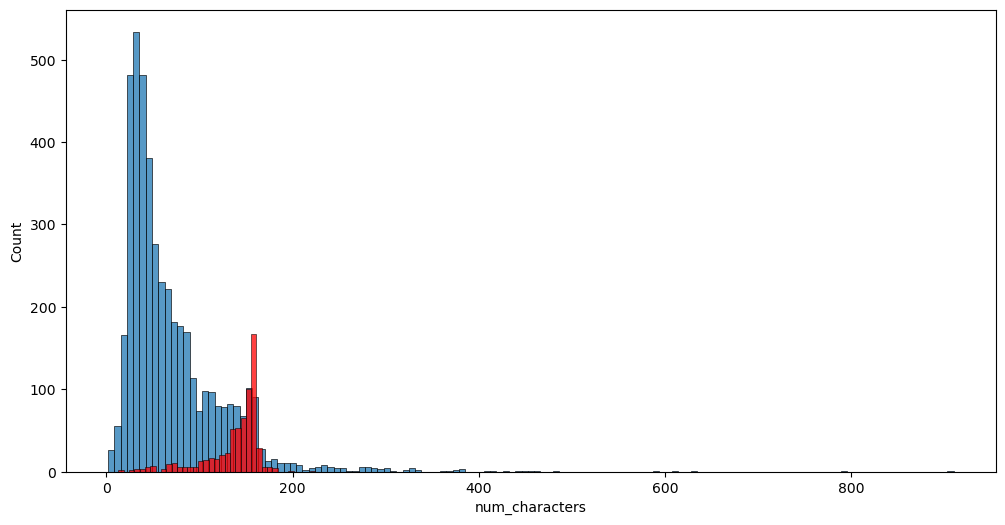

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color ='red')
plt.show()

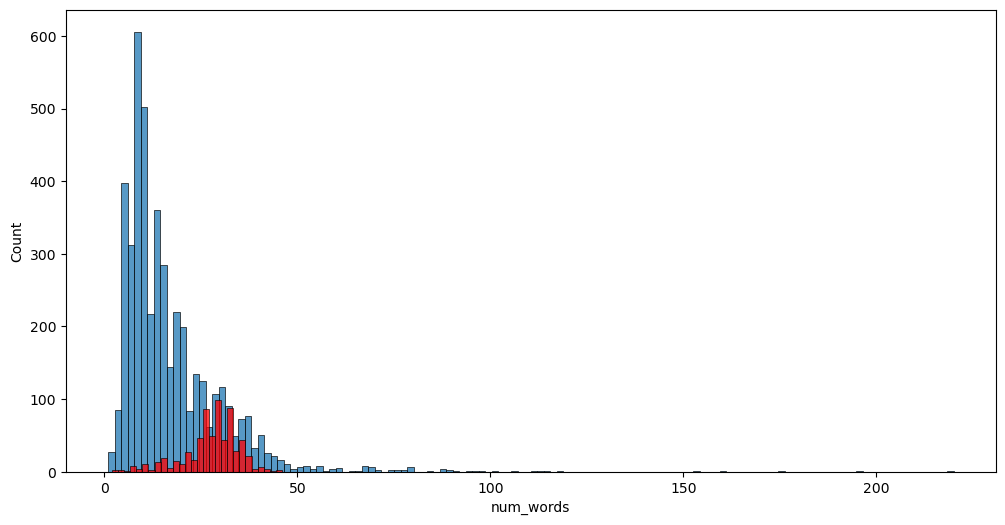

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color ='red')
plt.show()

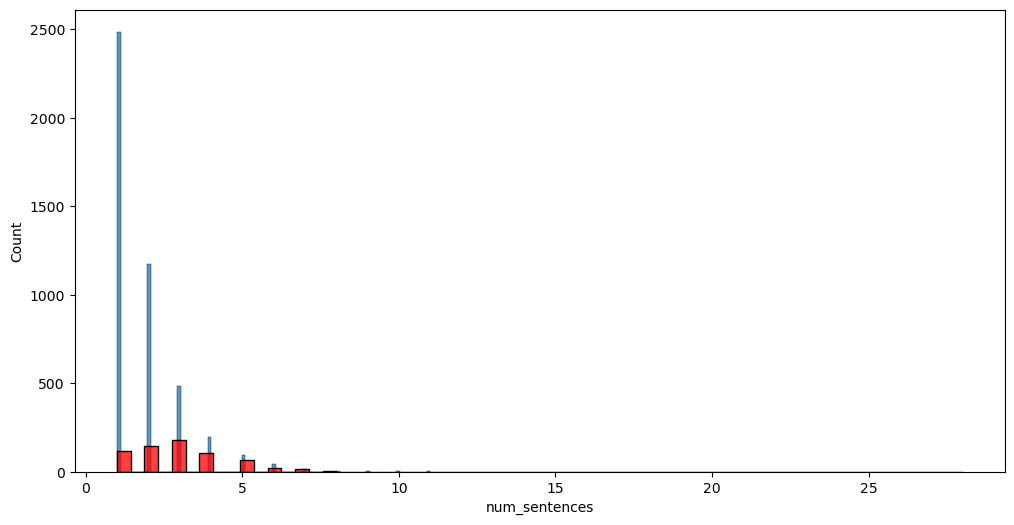

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color ='red')
plt.show()

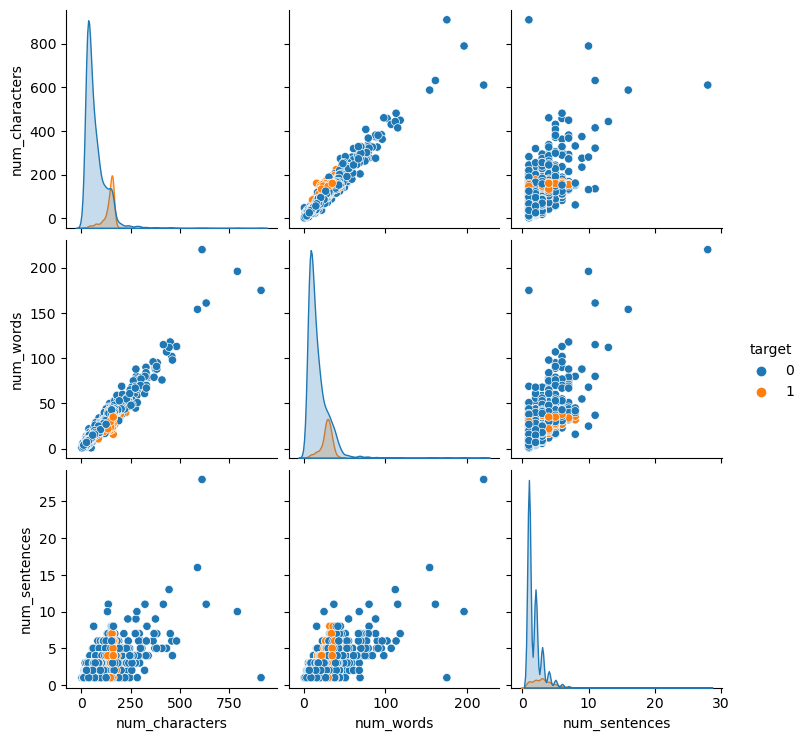

In [39]:
sns.pairplot(df,hue='target')
plt.show()

C:\Users\jmd\AppData\Local\Temp\ipykernel_7148\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

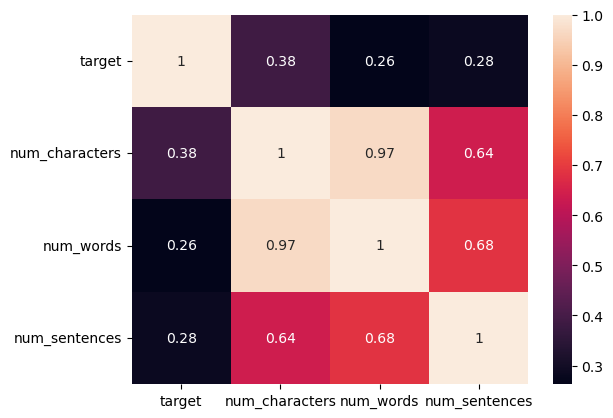

In [40]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

### 
1. Lower case
2. Tokenization
3. Remove special characters
4. Removing stop words and punctuations
5. Stemming

In [41]:
#nltk.download('stopwords')

In [42]:
# from nltk.corpus import stopwords
# stopwords.words('english')

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
stopwords = ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'don',
 "don't",
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [44]:
#from nltk.corpus import stopwords
#import string

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():# keeps only the alpha numeric characters
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text: # this text is different from earlier text, as it has no special characters
        if i not in stopwords and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        y = [*set(y)]
        
    return ' '.join(y)

In [47]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...' ) # special characters removed successfully

'world la jurong got cine bugi n great avail go point e buffet amor wat crazi'

In [48]:
ps.stem('dance')

'danc'

In [49]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\jmd\AppData\Local\Temp\ipykernel_7148\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,world la jurong got cine bugi n great avail go...
1,0,Ok lar... Joking wif u oni...,29,8,2,oni u ok joke lar wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free wkli appli txt 08452810075over18 comp win...
3,0,U dun say so early hor... U c already then say...,49,13,1,hor dun earli u say c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,think live though around nah goe usf


### Making a wordcloud of spam keywords

In [52]:
#pip install wordcloud

In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep =' '))

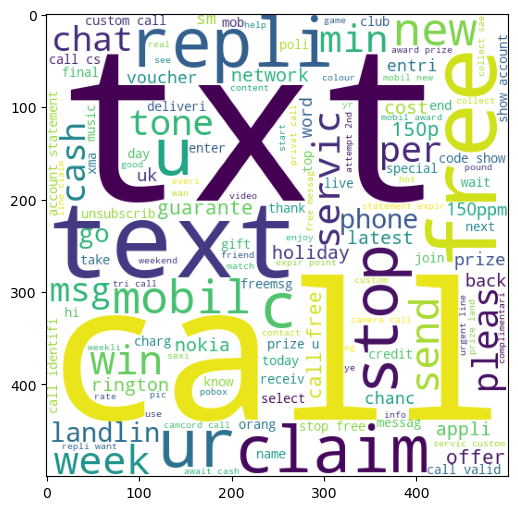

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [56]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep =' '))

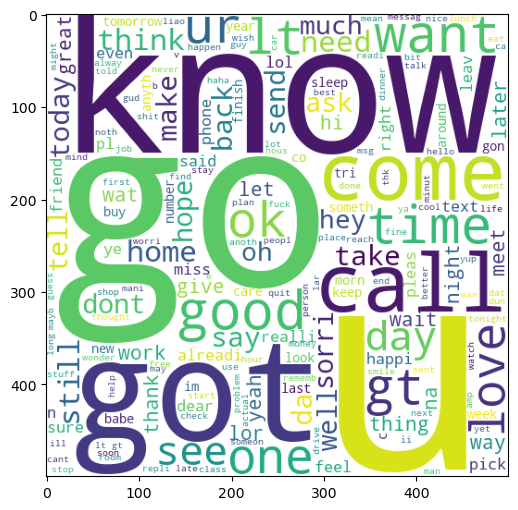

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

### To make a list of all the words in Spam

In [58]:
df[df['target']==1]['transformed_text']

2       free wkli appli txt 08452810075over18 comp win...
5       still fun xxx chg send rcv like hey ok 3 tb wo...
8       code call winner hour prize receivea network v...
9       free r co mobil month u entitl 08002986030 11 ...
11      info repli 6day win tsandc cash six pound 4 se...
                              ...                        
5537    want 2667 wc1n cost ring sex 3xx 30 explicit 0...
5540    free day mega 0870 dont bailiff chatlin sed go...
5547    etc free record min mobil contract orang text ...
5566    free repli postcod pound text name o2 pl great...
5567    per easi minut pound prize u 2nd now1 contact ...
Name: transformed_text, Length: 653, dtype: object

In [59]:
spam_corpus =[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [60]:
len(spam_corpus)

9389

In [61]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

0     283
1     146
2     131
3     118
4     106
5     100
6      94
7      94
8      93
9      90
10     89
11     86
12     74
13     72
14     63
15     63
16     58
17     56
18     56
19     51
20     50
21     50
22     48
23     48
24     46
25     45
26     45
27     44
28     44
29     43
Name: 1, dtype: int64

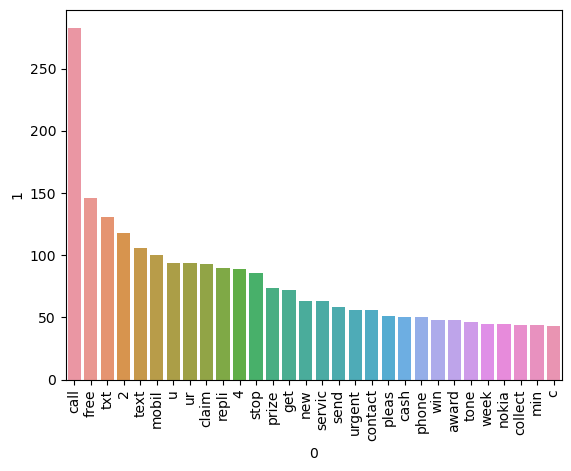

In [62]:
from collections import Counter
sns.barplot(x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [63]:
ham_corpus =[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

33471

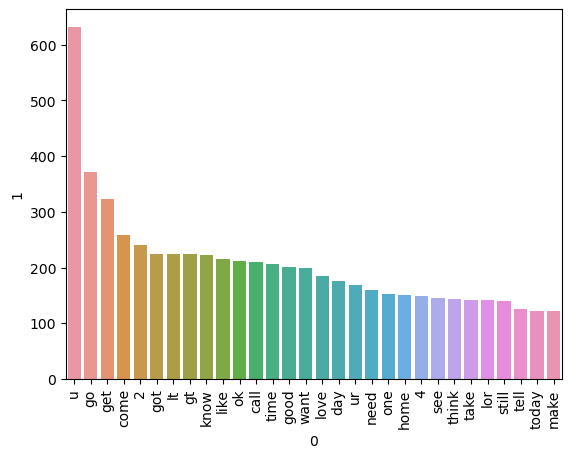

In [65]:
sns.barplot(x= pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building 
#### using Naive Bayes, since it works good on Textual data

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [67]:
X = cv.fit_transform(df['transformed_text']).toarray() #57:41mins

In [68]:
X.shape

(5169, 6708)

In [69]:
y=df['target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
y.shape

(5169,)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [75]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [76]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred1))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred1))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred1))

Accuracy Score :  0.8820116054158608
Confusion Matrix :  
 [[793 103]
 [ 19 119]]
Precision score :  0.536036036036036


In [77]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred2))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred2))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred2))

Accuracy Score :  0.965183752417795
Confusion Matrix :  
 [[873  23]
 [ 13 125]]
Precision score :  0.8445945945945946


In [78]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred3))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred3))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred3))

Accuracy Score :  0.9700193423597679
Confusion Matrix :  
 [[893   3]
 [ 28 110]]
Precision score :  0.9734513274336283


### Since we want higher precision (bcz data is imbalanced) there we will now try TFIDF method

In [79]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) #
X = tfidf.fit_transform(df['transformed_text']).toarray() #57:41mins

In [80]:
# from sklearn.preprocessing import MinMaxScaler #since standard scaler returns negative values which Naive Bayes doesn't accept
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [81]:
# appending the num_character col to X
# X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [82]:
X.shape

(5169, 3000)

In [83]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [86]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred1))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred1))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred1))

Accuracy Score :  0.8762088974854932
Confusion Matrix :  
 [[793 103]
 [ 25 113]]
Precision score :  0.5231481481481481


In [87]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred2))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred2))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred2))

Accuracy Score :  0.9758220502901354
Confusion Matrix :  
 [[896   0]
 [ 25 113]]
Precision score :  1.0


In [88]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score : ',accuracy_score(y_test,y_pred3))
#print('\n')
print('Confusion Matrix : ','\n',confusion_matrix(y_test,y_pred3))
#print('\n')
print('Precision score : ',precision_score(y_test,y_pred3))

Accuracy Score :  0.9825918762088974
Confusion Matrix :  
 [[895   1]
 [ 17 121]]
Precision score :  0.9918032786885246


In [89]:
#pip install xgboost

In [90]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [91]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    #'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [92]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [93]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.9758220502901354, 1.0)

In [94]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9758220502901354
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8181818181818182
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  AdaBoost
Accuracy -  0.9584139264990329
Precision -  0.9279279279279279
For  ETC
Accuracy -  0.97678916827853
Precision -  0.975
For  GBDT
Accuracy -  0.9564796905222437
Precision -  0.9514563106796117
For  xgb
Accuracy -  0.971953578336557
Precision -  0.9504132231404959


In [95]:
performance_df_0 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [96]:
performance_df_0

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.975822,1.000000
0,SVC,0.976789,0.975000
7,ETC,0.976789,0.975000
5,RF,0.974855,0.974576
8,GBDT,0.956480,0.951456
9,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
6,AdaBoost,0.958414,0.927928
3,DT,0.934236,0.818182


In [97]:
performance_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [98]:
performance_df_scaled

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.975822,1.000000
0,SVC,0.976789,0.975000
7,ETC,0.976789,0.975000
5,RF,0.974855,0.974576
8,GBDT,0.956480,0.951456
9,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
6,AdaBoost,0.958414,0.927928
3,DT,0.934236,0.818182


In [99]:
performance_df_newcol_numchars = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [100]:
performance_df_newcol_numchars

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.975822,1.000000
0,SVC,0.976789,0.975000
7,ETC,0.976789,0.975000
5,RF,0.974855,0.974576
8,GBDT,0.956480,0.951456
9,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
6,AdaBoost,0.958414,0.927928
3,DT,0.934236,0.818182


In [101]:
performance_df_p = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df_p

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.975822,1.000000
0,SVC,0.976789,0.975000
7,ETC,0.976789,0.975000
5,RF,0.974855,0.974576
8,GBDT,0.956480,0.951456
9,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
6,AdaBoost,0.958414,0.927928
3,DT,0.934236,0.818182


In [102]:
performance_df1 = pd.melt(performance_df_0, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.975822
2,SVC,Accuracy,0.976789
3,ETC,Accuracy,0.976789
4,RF,Accuracy,0.974855
5,GBDT,Accuracy,0.956480
6,xgb,Accuracy,0.971954
7,LR,Accuracy,0.951644
8,AdaBoost,Accuracy,0.958414
9,DT,Accuracy,0.934236


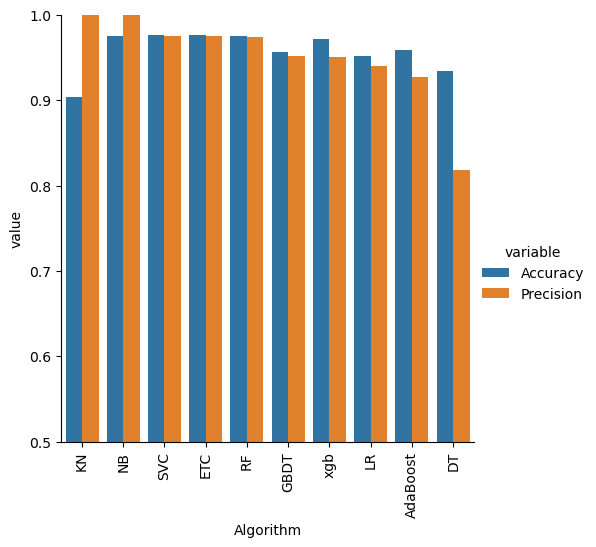

In [103]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

### 1. max_features
change the max_features parameter of Tfidf, earlier Null, now set to 3000

In [104]:
performance_df_3000 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [105]:
performance_df_3000

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.904255,1.000000
2,NB,0.975822,1.000000
0,SVC,0.976789,0.975000
7,ETC,0.976789,0.975000
5,RF,0.974855,0.974576
8,GBDT,0.956480,0.951456
9,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
6,AdaBoost,0.958414,0.927928
3,DT,0.934236,0.818182


In [106]:
performance_df_scaled = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [107]:
performance_df_newcol_numchars = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [108]:
performance_df_newcol_numchars

,Algorithm,Accuracy_num_chars,Precision_num_chars
1,KN,0.904255,1.000000
2,NB,0.975822,1.000000
0,SVC,0.976789,0.975000
7,ETC,0.976789,0.975000
5,RF,0.974855,0.974576
8,GBDT,0.956480,0.951456
9,xgb,0.971954,0.950413
4,LR,0.951644,0.940000
6,AdaBoost,0.958414,0.927928
3,DT,0.934236,0.818182


In [109]:
new_df = performance_df_0.merge(performance_df_3000,on='Algorithm')

In [110]:
new_df_3itr = new_df.merge(performance_df_scaled,on = 'Algorithm')

In [111]:
new_df_3itr

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000
2,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,ETC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,RF,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,GBDT,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456
6,xgb,0.971954,0.950413,0.971954,0.950413,0.971954,0.950413
7,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
8,AdaBoost,0.958414,0.927928,0.958414,0.927928,0.958414,0.927928
9,DT,0.934236,0.818182,0.934236,0.818182,0.934236,0.818182


In [112]:
new_df_4itr = new_df_3itr.merge(performance_df_newcol_numchars,on = 'Algorithm')

In [113]:
new_df_4itr

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000,0.904255,1.000000
1,NB,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000,0.975822,1.000000
2,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
3,ETC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
4,RF,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,GBDT,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456,0.956480,0.951456
6,xgb,0.971954,0.950413,0.971954,0.950413,0.971954,0.950413,0.971954,0.950413
7,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
8,AdaBoost,0.958414,0.927928,0.958414,0.927928,0.958414,0.927928,0.958414,0.927928
9,DT,0.934236,0.818182,0.934236,0.818182,0.934236,0.818182,0.934236,0.818182


In [114]:
#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [115]:
#new_df_scaled

In [116]:
#temp_df

In [117]:
#performance_df.merge(temp_df,on='Algorithm') # both values are same as we have run the same code for them, correct it later

## Try Scaling

In [118]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [119]:
# # Voting Classifier
# svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [120]:
#voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [121]:
#voting.fit(X_train,y_train)

In [122]:
# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [123]:
# # Applying stacking
# estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

# from sklearn.ensemble import StackingClassifier

# clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))



In [124]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))